Analysis of Mass Shootings in the United States

In [26]:
#Get dependencies
import csv
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

#For plotting on US map
import folium
from folium import plugins
from branca.colormap import linear

#Read csv data file 
df = pd.read_csv('../data/USMassShootings.csv')
df.head()


,Case,Location,State,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,...,Type of weapons,Weapon,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Yountville veterans home shooting,"Yountville, CA",California,3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,...,semiautomatic rifle; shotgun,semiautomatic rifle,NaN,Asian,Male,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.392496,-122.366528,Mass
1,Stoneman Douglas High School shooting,"Parkland, Florida",Florida,2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,...,semiautomatic rifle,semiautomatic rifle,AR-15,White,Male,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,NaN,NaN,Mass
2,Pennsylvania carwash shooting,"Melcroft, PA",Pennsylvania,1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,...,semiautomatic rifle and semiautomatic handgun,semiautomatic rifle,NaN,White,Male,http://www.wpxi.com/news/top-stories/family-me...,NaN,NaN,NaN,Mass
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",California,11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,...,semiautomatic rifles,illegally modified rifle,Two illegally modified rifles,White,Male,https://www.nbcnews.com/news/us-news/californi...,NaN,NaN,NaN,Spree
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",Texas,11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,...,semiautomatic rifle,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,Male,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [27]:
#Get total victims by Year
total_victims_df = df.groupby(['Year']).sum()
total_victims_df.reset_index(inplace=True)

#total_victims_df

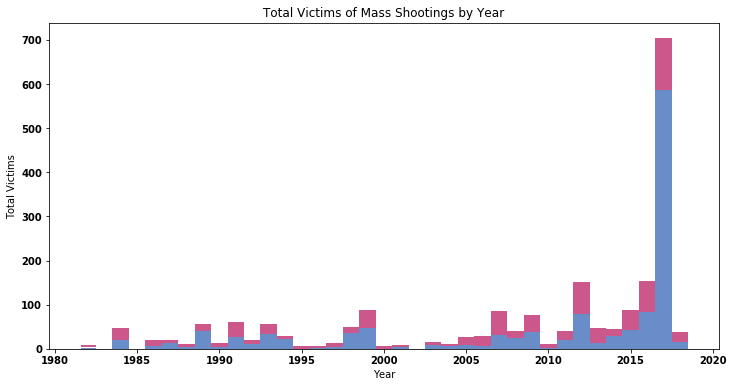

In [28]:
#Stacked bar chart for Victims by Year
# y-axis in bold
rc('font', weight='bold')
 
# Y-axis - Two bars for injured vs fatalities 
injured_bars = total_victims_df['Injured']
fatalities_bar = total_victims_df['Fatalities']

# X-axis values
year = total_victims_df['Year']

#Set figure size and bar width
plt.figure(figsize=(12,6))
barWidth = 1

# Create injured victims' bars
plt.bar(year, injured_bars, color='#688dc9', edgecolor='white', width=barWidth)
# Create fatalities' bars (on top of injured)
plt.bar(year, fatalities_bar, bottom=injured_bars, color='#cc578a', edgecolor='white', width=barWidth)


# Label X-axis
plt.xlabel("Year")
# Label Y-axis
plt.ylabel("Total Victims")
# Plot title
plt.title("Total Victims of Mass Shootings by Year")
plt.savefig('../plots/year.png')

# Show graphic
plt.show()



In [29]:
#Shootings on US map
victims_df = df.dropna(axis=0, how='any')
victims_df = victims_df.filter(['latitude','longitude','Total victims'], axis=1)

#Find the median latitude and logitude
middle_lat = victims_df['latitude'].median()
middle_lon = victims_df['longitude'].median()

#Create a color scale for number of victims
colormap = linear.YlOrRd.scale(
    victims_df['Total victims'].min(),
    int(victims_df['Total victims'].median()))

colormap


In [30]:
#Plot incidents on map by victims 
victims_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=4)

# mark each incident as a point
for index, row in victims_df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=2,
                        fill=True,
                        fill_color=colormap(row['Total victims']),
                        color=colormap(row['Total victims']),
                        fill_opacity=0.5
                        ).add_to(victims_map)


legend_html = '''<div style="position: fixed; 
     bottom: 200px; left: 850px; width: 500px; height: 100px; 
     border:0px solid grey; z-index:9999; font-size:12px;">
     &nbsp; Victims <br/>
         <img src="images/colormap.png"></img>
      </div>
     '''

victims_map.get_root().html.add_child(folium.Element(legend_html))
    
victims_map.save('Victims_Distribution.html')

victims_map

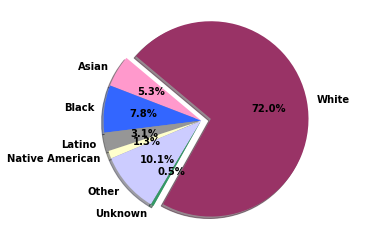

In [31]:
#Perpetrator profile
perp_df = df.groupby(['Race']).sum().reset_index()
#Create lists for pie chart
race = perp_df['Race'].tolist()
victims = perp_df['Total victims'].tolist()
colors = ['#FF99CC','#3366FF','#969696','#FFFFCC','#CCCCFF','#339966','#993366']
explode = (0, 0, 0, 0, 0, 0, 0.1)
#plot pie chart
plt.pie(victims, explode=explode, labels=race, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig('../plots/race.png')
plt.show()

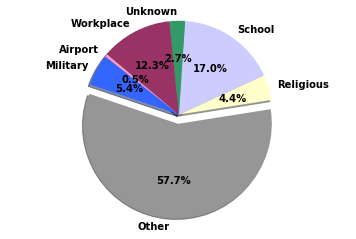

In [32]:
#Venues
venue_df = df.groupby(['Venue']).sum().reset_index()
#Create lists for pie chart
venues = venue_df['Venue'].tolist()
victims = venue_df['Total victims'].tolist()
colors = ['#FF99CC','#3366FF','#969696','#FFFFCC','#CCCCFF','#339966','#993366']
explode = (0, 0, 0.1, 0, 0, 0, 0)
#plot pie chart
plt.pie(victims, explode=explode, labels=venues, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig('../plots/venue.png')
plt.show()

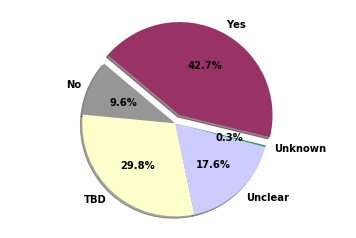

In [33]:
#Prior signs of mental illness
mental_df = df.groupby(['Prior_mental_issue']).sum().reset_index()
#Create lists for pie chart
issues = mental_df['Prior_mental_issue'].tolist()
victims = mental_df['Total victims'].tolist()
colors = ['#969696','#FFFFCC','#CCCCFF','#339966','#993366']
explode = (0, 0, 0, 0, 0.1)
#plot pie chart
plt.pie(victims, explode=explode, labels=issues, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig('../plots/mental.png')
plt.show()

In [38]:

#Get victims data by State
victims_state_df = df.groupby('State').sum().reset_index()
victims_state_df = victims_state_df[['State','Total victims']].copy()

#Plot  victims by State
state_map = folium.Map(location=[43, -100],
                          zoom_start=4)

state_map.choropleth(
    geo_data=open('../data/us-states.json').read(),
    data=victims_state_df,
    columns=['State', 'Total victims'],
    threshold_scale=[5, 20, 50, 100, 200, 300],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    legend_name='Victims by State'
    )

state_map.save('Victims_by_State.html')

state_map
#victims_state_df


In [35]:
#Weapons used
#Get percentage data by weapon
weapons_df = df.groupby('Weapon').agg({'Case':'count', 'Total victims': 'sum'}).reset_index()
weapons_df


,Weapon,Case,Total victims
0,assault rifle,9,722
1,handgun,10,81
2,illegally modified rifle,1,15
3,long gun,1,12
4,revolver,1,7
5,rifle,9,105
6,semiautomatic handgun,52,861
7,semiautomatic rifle,8,226
8,shotgun,6,54
